# 1. Creating a list of all required data files

In [2]:
from os import listdir
from os.path import isfile, join

def get_file_names():

    norm_files = [f for f in listdir('/content/drive/MyDrive/python_code_major/healthy') ]
    schiz_files = [f for f in listdir('/content/drive/MyDrive/python_code_major/schizophrenic') ]
    schiz_list=[]
    for item in schiz_files:
        newl='/content/drive/MyDrive/python_code_major/schizophrenic/'+item
        schiz_list.append(newl)
    norm_list=[]
    for item in norm_files:
        newl='/content/drive/MyDrive/python_code_major/healthy/'+item
        norm_list.append(newl)

    compiled_list = [*schiz_list, *norm_list]
    return compiled_list
ans=get_file_names()
print(ans)

['/content/drive/MyDrive/python_code_major/schizophrenic/33w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/155w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/517w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/485w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/312w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/088w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/276w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/382w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/221w.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/510-1W.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/683w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/575w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/219w1.eea', '/content/drive/MyDrive/python_code_major/schizophrenic/515w1.eea', '/content/drive/MyDrive/python_code_major/schizo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Creating the image dataset**

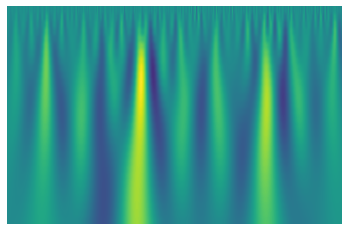

In [5]:
'''540 window size for cwt 7560/540=14 => about 14 images per test subjects per electrode
In the dataset 84 individuals are there so overall 1176 images per electrode hence total size
of dataset is 18,816 images. The size of each image is about 33kb which means total data set size is 620,928 kb
which is 607 Mb approx. '''

# naming convention of image file is pernum_schiz/norm_electrode number_image window number
#eg- per1_norm_14_8
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import csv

num=57
comp_list = get_file_names()
eff_list = comp_list[56:57]
results_dir = '/content/drive/MyDrive/python_code_major/image_dataset/'
for item in eff_list:
    file = open(item)
    csvreader = csv.reader(file)
    part1='per'+str(num)+'_'
    num+=1
    if 'schizophrenic' in item:
        part2='schiz_'
    elif 'healthy' in item:
        part2='norm_'
    xmain = []
    for row in csvreader:
        xmain.append(float(row[0]))
    first = 0
    last = 7560
    for j in range(0,16):
      if(j>=6):
          part3=str(j+1)+'_'
          x=xmain[first:last]
          nested_first=0
          nested_last = 540
          for i in range (0,14):
              part4=str(i+1)
              y=x[nested_first:nested_last]
              t = np.linspace(-1, 1, 200, endpoint=False)
              sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
              widths = np.arange(1, 31)
              cwtmatr = signal.cwt(y, signal.ricker, widths)
              plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], aspect='auto',
                        vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

              plt.axis('off')
              title = part1 + part2 + part3 + part4
              plt.savefig(results_dir+title, bbox_inches='tight',pad_inches = 0)
              nested_first=nested_last
              nested_last=nested_last+540
          first = last
          last= last+7560
      else:
          continue